In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Define the paths to your dataset
train_data_dir = 'G:\Online Class\ThesisRelated\Dataset\coins_dataset'
valid_data_dir = 'G:\Online Class\ThesisRelated\Dataset\coins_dataset'
test_data_dir = 'G:\Online Class\ThesisRelated\Dataset\coins_dataset'

In [7]:
# Parameters
input_shape = (224, 224, 3)  # Input shape suitable for VGG19
num_classes = 3 # Change this to match the number of currency classes in your dataset
batch_size = 32
epochs = 10

In [8]:

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10257 images belonging to 3 classes.
Found 10257 images belonging to 3 classes.


In [9]:
# Create the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

80134624/80134624 [==============================] - 76s 1us/step


In [10]:
# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [11]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/10
320/320 [==============================] - 8728s 27s/step - loss: 0.3275 - accuracy: 0.8754 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 2/10
320/320 [==============================] - 8509s 27s/step - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0439 - val_accuracy: 0.9678
Epoch 3/10
320/320 [==============================] - 9023s 28s/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0156 - val_accuracy: 0.9969
Epoch 4/10
320/320 [==============================] - 8563s 27s/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0177 - val_accuracy: 0.9976
Epoch 5/10
320/320 [==============================] - 9757s 31s/step - loss: 0.0325 - accuracy: 0.9913 - val_loss: 0.0044 - val_accuracy: 0.9999
Epoch 6/10
320/320 [==============================] - 9415s 29s/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0100 - val_accuracy: 0.9998
Epoch 7/10
320/320 [==============================] - 10215s 32s/step - loss: 0.0210 - accuracy: 0.9946 - val_loss: 0.0027 - val_a

In [1]:
# Save the trained model
model.save('currency_detection_model.h5')

NameError: name 'model' is not defined

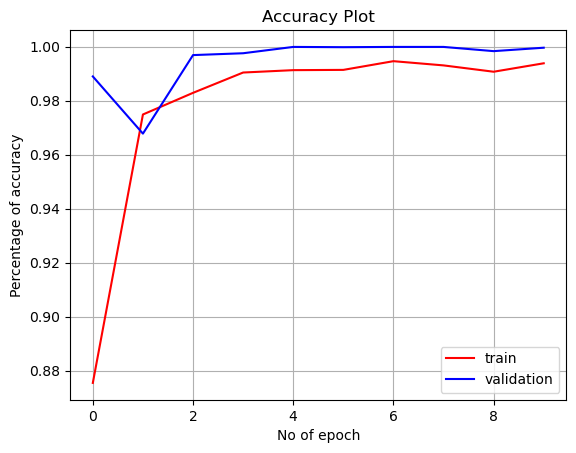

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Accuracy Plot')
plt.xlabel('No of epoch')
plt.ylabel('Percentage of accuracy')
plt.grid(True)
plt.legend()
plt.show()

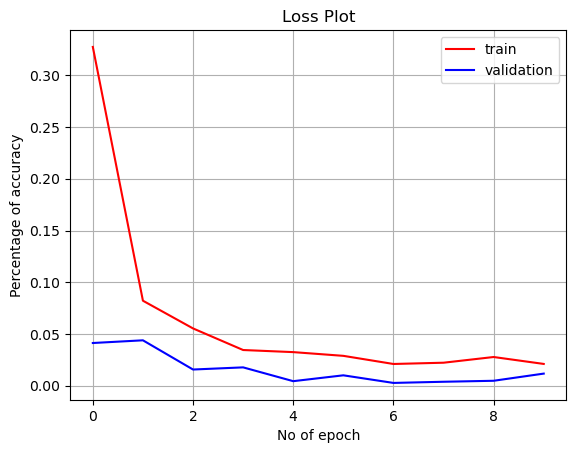

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss Plot')
plt.xlabel('No of epoch')
plt.ylabel('Percentage of accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Set the parameters for the data generators
batch_size = 32
img_height, img_width = 224, 224

# Define the class names
class_names = ["1tk", "2tk", "5tk"]

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\User\Desktop\Thesis\Work\currency_detection_model.h5")

# Create the Tkinter GUI
root = tk.Tk()
root.title("Bangladeshi Currency Classification")
root.geometry("800x1000")
root.configure(bg="yellow")  # Set the window background color

# Function to classify selected images
def classify_images():
    clear_displayed_images()  # Clear the previously displayed images and labels
    file_paths = filedialog.askopenfilenames()

    if file_paths:
        total_currency_value = 0

        for file_path in file_paths:
            # Load and preprocess the image
            image = Image.open(file_path)
            image = image.resize((img_width, img_height))
            image = image.convert("RGB")
            image_array = np.array(image) / 255.0
            image_array = np.expand_dims(image_array, axis=0)

            # Make a prediction
            prediction = model.predict(image_array)
            predicted_class_index = np.argmax(prediction)
            predicted_class = class_names[predicted_class_index]

            # Calculate the currency value and add it to the total
            currency_value = int(predicted_class.replace('tk', ''))
            total_currency_value += currency_value

            # Display the image and predicted currency in a new row
            display_image(image, predicted_class)

        # Display the total currency value
        total_label = tk.Label(root, text=f"Total Currency is: {total_currency_value} tk", font=("Arial", 12))
        total_label.pack(pady=10)
    else:
        result_label.config(text="No images selected.")

def clear_displayed_images():
    for widget in image_frame.winfo_children():
        widget.destroy()

    # Clear the total currency label
    for widget in root.winfo_children():
        if widget.winfo_class() == "Label" and widget["text"].startswith("Total Currency"):
            widget.destroy()

def display_image(image, predicted_class):
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(image_frame, image=image)
    image_label.image = image
    image_label.pack(pady=10)
    label = tk.Label(image_frame, text=f"Predicted currency: {predicted_class}", font=("Arial", 12))
    label.pack(pady=10)

# Create GUI components
select_button = tk.Button(root, text="Select Images", command=classify_images, bg="hotpink", fg="white")
select_button.pack(pady=10)

clear_button = tk.Button(root, text="Clear", command=clear_displayed_images, bg="red", fg="white")
clear_button.pack(pady=10)

image_frame = tk.Frame(root)
image_frame.pack()

result_label = tk.Label(root, font=("Nunito", 20), wraplength=500)
result_label.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 [==============================] - 0s 288ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from tensorflow.keras.preprocessing import image  # Import the image module

# Define true labels for a set of test images (ground truth)
true_labels = ["1 tk", "2 tk", "5 tk"]  # Update this list to match the number of test images

# Define a list of test image paths
test_image_paths = [
    r"G:\Online Class\ThesisRelated\output_of_coins\Test\1(2608).png",
    r"G:\Online Class\ThesisRelated\output_of_coins\Test\5tk.jpeg",
    r"G:\Online Class\ThesisRelated\output_of_coins\Test\2old.jpeg"
    # Add more image paths as needed, but ensure they match the true labels
]

# Initialize an empty list to store predicted labels
predicted_labels = []

# Define class names (should match your true labels)
class_names = ["1 tk", "2 tk", "5 tk"]

# Load the trained model (update the model path as needed)
model = tf.keras.models.load_model(r"C:\Users\User\Desktop\Thesis\Work\currency_detection_model.h5")

# Loop through your test images and make predictions
for image_path in test_image_paths:
    img_pred = image.load_img(image_path, target_size=(224, 224))
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis=0)
    
    rslt = model.predict(img_pred)
    
    # Find the predicted class index
    predicted_class_index = np.argmax(rslt)
    
    # Ensure that the predicted class index is within the valid range of class_names
    if predicted_class_index < len(class_names):
        predicted_label = class_names[predicted_class_index]
    else:
        predicted_label = "Unknown"  # Handle cases where the index is out of range
    
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# You can also print a classification report for additional metrics
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)


1/1 [==============================] - 0s 356ms/step
Confusion Matrix:
[[1 0 0]
 [1 0 0]
 [0 1 0]]
Classification Report:
              precision    recall  f1-score   support

        1 tk       0.50      1.00      0.67         1
        2 tk       0.00      0.00      0.00         1
        5 tk       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3



Confusion Matrix:
[[1 0 0]
 [1 0 0]
 [0 1 0]]


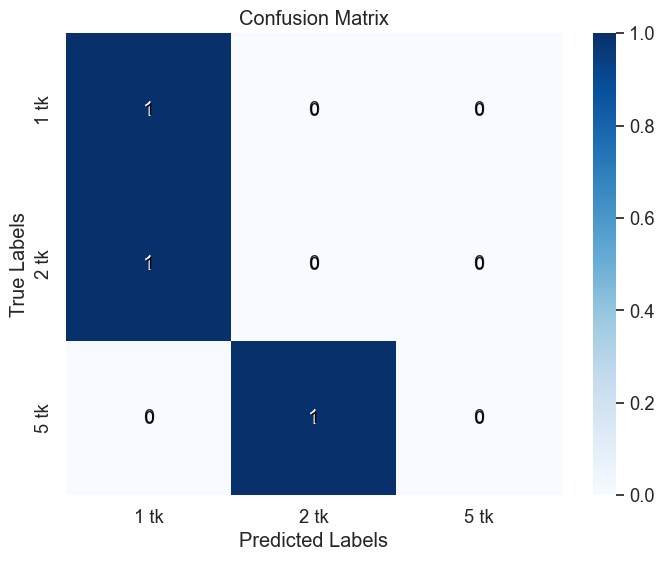

Classification Report:
              precision    recall  f1-score   support

        1 tk       0.50      1.00      0.67         1
        2 tk       0.00      0.00      0.00         1
        5 tk       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3



In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Define class names (should match your true labels)
class_names = ["1 tk", "2 tk", "5 tk"]

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale as needed

# Create a heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Add labels to the cells
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, confusion_mat[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

# You can also print a classification report for additional metrics
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)
